In [9]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import numpy as np
try:
    import mxnet as mx
except:
    sys.stderr.write("Cannot import mxnet.\n")
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.exposure import rescale_intensity
from skimage.transform import rotate

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities import *
from distributed_utilities import *
from visualization_utilities import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from sklearn.externals import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import GradientBoostingClassifier 

sys.path.append('/home/yuncong/csd395/xgboost/python-package')
try:
    from xgboost.sklearn import XGBClassifier
except:
    sys.stderr.write('xgboost is not loaded.')

In [11]:
batch_size = 256
model_dir_name = 'inception-bn-blue'
model_name = 'inception-bn-blue'
model, mean_img = load_mxnet_model(model_dir_name=model_dir_name, model_name=model_name, 
                                   num_gpus=1, batch_size=batch_size)

In [12]:
win_id = 5

In [13]:
def extract_one_metric(metrics_all_ntrain, which, thresh=None):
    if thresh is None:
        return {ntrain: {test_cond: [res[which] for res in res_all_trials]
                   for test_cond, res_all_trials in x.iteritems()}
         for ntrain, x in metrics_all_ntrain.iteritems()}
    else:
        return {ntrain: {test_cond: [res[which][thresh] for res in res_all_trials]
                   for test_cond, res_all_trials in x.iteritems()}
         for ntrain, x in metrics_all_ntrain.iteritems()}

In [14]:
def plot_result_wrt_ntrain(test_metrics_all_ntrain, ylabel='', title=''):

    for test_condition in test_metrics_all_ntrain.values()[1].keys():
        ntrains, accs, errs = zip(*sorted([(ntrain, np.mean(x[test_condition]), np.std(x[test_condition]))
              for ntrain, x in test_metrics_all_ntrain.iteritems() if len(x) > 0]))
        plt.errorbar(ntrains, accs, yerr=errs, label=test_condition[1]);
    plt.xlabel('# traing patches');
    plt.ylabel(ylabel);
    plt.title(title);
    plt.legend(loc='upper right');
    plt.ylim([0.5, 1.]);
    plt.xlim([0,16000]);
    plt.show()

aws s3 cp --recursive "s3://mousebrainatlas-data/CSHL_labelings_v3/MD662" "/home/yuncong/CSHL_labelings_v3/MD662" --exclude "*" --include "*win5*warp*grid_indices_lookup*"
latest timestamp:  01052018141856
aws s3 cp --recursive "s3://mousebrainatlas-data/CSHL_labelings_v3/ChatCryoJane201710" "/home/yuncong/CSHL_labelings_v3/ChatCryoJane201710" --exclude "*" --include "*win5*grid_indices_lookup*"
latest timestamp:  12132017032001


Computing class label to grid indices lookup-table for section 107...
Computing class label to grid indices lookup-table for section 108...
Computing class label to grid indices lookup-table for section 109...
Computing class label to grid indices lookup-table for section 110...
Computing class label to grid indices lookup-table for section 111...
Computing class label to grid indices lookup-table for section 112...
Computing class label to grid indices lookup-table for section 113...
Computing class label to grid indices lookup-table for section 114...
Computing class label to grid indices lookup-table for section 115...
Computing class label to grid indices lookup-table for section 116...
Computing class label to grid indices lookup-table for section 117...
Computing class label to grid indices lookup-table for section 118...
Computing class label to grid indices lookup-table for section 119...
Computing class label to grid indices lookup-table for section 120...
Computing class labe

Computing class label to grid indices lookup-table for section 184...
MD662, sec 184: 239 patches from label 7N.
MD662, sec 184: 614 patches from label 7N_surround_200_noclass.
Computing class label to grid indices lookup-table for section 185...
MD662, sec 185: 234 patches from label 7N.
MD662, sec 185: 586 patches from label 7N_surround_200_noclass.
Computing class label to grid indices lookup-table for section 186...
MD662, sec 186: 214 patches from label 7N.
MD662, sec 186: 640 patches from label 7N_surround_200_noclass.
Computing class label to grid indices lookup-table for section 187...
MD662, sec 187: 209 patches from label 7N.
MD662, sec 187: 652 patches from label 7N_surround_200_noclass.
Computing class label to grid indices lookup-table for section 188...
MD662, sec 188: 195 patches from label 7N.
MD662, sec 188: 654 patches from label 7N_surround_200_noclass.
Computing class label to grid indices lookup-table for section 189...
MD662, sec 189: 183 patches from label 7N.
MD

Computing class label to grid indices lookup-table for section 282...
MD662, sec 282: 373 patches from label 7N_surround_200_noclass.
Computing class label to grid indices lookup-table for section 283...
MD662, sec 283: 402 patches from label 7N_surround_200_noclass.
Computing class label to grid indices lookup-table for section 284...
MD662, sec 284: 0 patches from label 7N.
MD662, sec 284: 465 patches from label 7N_surround_200_noclass.
Computing class label to grid indices lookup-table for section 285...
MD662, sec 285: 27 patches from label 7N.
MD662, sec 285: 495 patches from label 7N_surround_200_noclass.
Computing class label to grid indices lookup-table for section 286...
MD662, sec 286: 57 patches from label 7N.
MD662, sec 286: 526 patches from label 7N_surround_200_noclass.
Computing class label to grid indices lookup-table for section 287...
MD662, sec 287: 98 patches from label 7N.
MD662, sec 287: 562 patches from label 7N_surround_200_noclass.
Computing class label to grid

MD662, sec 324: 16 patches from label 7N_surround_200_Sp5I.
MD662, sec 324: 117 patches from label 7N_surround_200_Sp5O.
MD662, sec 324: 237 patches from label 7N_surround_200_noclass.
Computing class label to grid indices lookup-table for section 325...
MD662, sec 325: 12 patches from label 7N_surround_200_Sp5I.
MD662, sec 325: 92 patches from label 7N_surround_200_Sp5O.
MD662, sec 325: 225 patches from label 7N_surround_200_noclass.
Computing class label to grid indices lookup-table for section 326...
MD662, sec 326: 11 patches from label 7N_surround_200_Sp5I.
MD662, sec 326: 16 patches from label 7N_surround_200_Sp5O.
MD662, sec 326: 217 patches from label 7N_surround_200_noclass.
Computing class label to grid indices lookup-table for section 327...
MD662, sec 327: 90 patches from label 7N_surround_200_Sp5I.
MD662, sec 327: 7 patches from label 7N_surround_200_Sp5O.
MD662, sec 327: 69 patches from label 7N_surround_200_noclass.
Computing class label to grid indices lookup-table for 

ChatCryoJane201710, sec 105: 836 patches from label 7N_surround_200_noclass.
Computing class label to grid indices lookup-table for section 106...
ChatCryoJane201710, sec 106: 802 patches from label 7N.
ChatCryoJane201710, sec 106: 830 patches from label 7N_surround_200_noclass.
Computing class label to grid indices lookup-table for section 107...
ChatCryoJane201710, sec 107: 813 patches from label 7N.
ChatCryoJane201710, sec 107: 829 patches from label 7N_surround_200_noclass.
Computing class label to grid indices lookup-table for section 108...
ChatCryoJane201710, sec 108: 844 patches from label 7N.
ChatCryoJane201710, sec 108: 840 patches from label 7N_surround_200_noclass.
Computing class label to grid indices lookup-table for section 109...
ChatCryoJane201710, sec 109: 740 patches from label 7N.
ChatCryoJane201710, sec 109: 811 patches from label 7N_surround_200_noclass.
Computing class label to grid indices lookup-table for section 110...
ChatCryoJane201710, sec 110: 640 patches 

Section 168 provides 7 positive patches.
Section 169 provides 24 positive patches.
Section 170 provides 72 positive patches.
Section 171 provides 88 positive patches.
Section 172 provides 124 positive patches.
Section 173 provides 142 positive patches.
Section 174 provides 154 positive patches.
Section 175 provides 181 positive patches.
Section 176 provides 192 positive patches.
Section 177 provides 199 positive patches.
Section 178 provides 218 positive patches.
Section 179 provides 226 positive patches.
Section 180 provides 233 positive patches.
Section 181 provides 234 positive patches.
Section 182 provides 240 positive patches.
Section 183 provides 237 positive patches.
Section 184 provides 239 positive patches.
Section 185 provides 234 positive patches.
Section 186 provides 214 positive patches.
Section 187 provides 209 positive patches.
Section 188 provides 195 positive patches.
Section 189 provides 183 positive patches.
Section 190 provides 180 positive patches.
Section 191 prov

No images are provided. Load instead.
Not using image_cache.
Load image: 15.04 seconds.
No images are provided. Load instead.


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD662/MD662_prep2_lossless/MD662&661-F126-2017.06.07-17.13.02_MD662_2_0377_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD662/MD662_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD662/MD662_prep2_lossless/MD662&661-F126-2017.06.07-17.13.02_MD662_2_0377_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD662/MD662_prep2_lossless/MD662&661-F126-2017.06.07-17.13.02_MD662_2_0377_prep2_lossless.tif"


Not using image_cache.
Load image: 27.72 seconds.
No images are provided. Load instead.
Not using image_cache.
Load image: 14.90 seconds.
No images are provided. Load instead.
Not using image_cache.
Load image: 15.83 seconds.
No images are provided. Load instead.


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD662/MD662_prep2_lossless/MD662&661-F121-2017.06.07-14.55.33_MD662_2_0362_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD662/MD662_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD662/MD662_prep2_lossless/MD662&661-F121-2017.06.07-14.55.33_MD662_2_0362_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD662/MD662_prep2_lossless/MD662&661-F121-2017.06.07-14.55.33_MD662_2_0362_prep2_lossless.tif"


Not using image_cache.
Load image: 29.16 seconds.
No images are provided. Load instead.
Not using image_cache.
Load image: 19.23 seconds.
No images are provided. Load instead.
Not using image_cache.
Load image: 14.22 seconds.
No images are provided. Load instead.
Not using image_cache.
Load image: 13.60 seconds.
No images are provided. Load instead.


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD662/MD662_prep2_lossless/MD662&661-F116-2017.06.07-04.39.41_MD662_2_0347_prep2_lossless.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD662/MD662_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD662/MD662_prep2_lossless/MD662&661-F116-2017.06.07-04.39.41_MD662_2_0347_prep2_lossless.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD662/MD662_prep2_lossless/MD662&661-F116-2017.06.07-04.39.41_MD662_2_0347_prep2_lossless.tif"


Not using image_cache.
Load image: 29.93 seconds.
No images are provided. Load instead.
Not using image_cache.
Load image: 15.62 seconds.
Compute variants: 0.02 seconds


(7431, 1, 224, 224)


Feature computation: 12.63 seconds
Compute variants: 0.01 seconds


(7431, 1, 224, 224)


Feature computation: 12.60 seconds
Compute variants: 0.01 seconds


(7431, 1, 224, 224)


Feature computation: 12.53 seconds
Compute variants: 0.01 seconds


(7431, 1, 224, 224)


Feature computation: 13.31 seconds
Compute variants: 0.01 seconds


(7431, 1, 224, 224)


Feature computation: 13.73 seconds
Compute variants: 0.01 seconds


(7431, 1, 224, 224)


Feature computation: 13.60 seconds
Compute variants: 0.01 seconds


(7431, 1, 224, 224)


Feature computation: 13.72 seconds
Compute variants: 0.01 seconds


(7431, 1, 224, 224)


Feature computation: 13.63 seconds
No images are provided. Load instead.
Not using image_cache.
Load image: 12.03 seconds.
No images are provided. Load instead.
Not using image_cache.
Load image: 12.14 seconds.
No images are provided. Load instead.
Not using image_cache.
Load image: 12.98 seconds.
No images are provided. Load instead.
Not using image_cache.
Load image: 11.96 seconds.
No images are provided. Load instead.
Not using image_cache.
Load image: 12.16 seconds.
No images are provided. Load instead.
Not using image_cache.
Load image: 12.08 seconds.
No images are provided. Load instead.
Not using image_cache.
Load image: 12.19 seconds.
No images are provided. Load instead.
Not using image_cache.
Load image: 11.97 seconds.
No images are provided. Load instead.
Not using image_cache.
Load image: 13.02 seconds.
No images are provided. Load instead.
Not using image_cache.
Load image: 12.46 seconds.
Compute variants: 0.01 seconds


(14674, 1, 224, 224)


Feature computation: 24.93 seconds
Fitting classifier: 0.02 seconds


Training: 10 positive, 10 negative
Test: 1000 positive, 1000 negative


Fitting classifier: 0.00 seconds


Training: 10 positive, 10 negative
Test: 1000 positive, 1000 negative


Fitting classifier: 0.01 seconds
Fitting classifier: 0.00 seconds


Training: 10 positive, 10 negative
Test: 1000 positive, 1000 negative


Fitting classifier: 0.02 seconds
Fitting classifier: 0.00 seconds


Training: 10 positive, 10 negative
Test: 1000 positive, 1000 negative


Fitting classifier: 0.02 seconds
Fitting classifier: 0.00 seconds


Training: 10 positive, 10 negative
Test: 1000 positive, 1000 negative


Fitting classifier: 0.02 seconds
Fitting classifier: 0.00 seconds


Training: 10 positive, 10 negative
Test: 1000 positive, 1000 negative


Fitting classifier: 0.02 seconds
Fitting classifier: 0.00 seconds


Training: 10 positive, 10 negative
Test: 1000 positive, 1000 negative


Fitting classifier: 0.01 seconds
Fitting classifier: 0.00 seconds


Training: 10 positive, 10 negative
Test: 1000 positive, 1000 negative


Fitting classifier: 0.02 seconds
Fitting classifier: 0.00 seconds


Training: 10 positive, 10 negative
Test: 1000 positive, 1000 negative


Fitting classifier: 0.01 seconds
Fitting classifier: 0.00 seconds


Training: 10 positive, 10 negative
Test: 1000 positive, 1000 negative


Fitting classifier: 0.02 seconds
Fitting classifier: 0.00 seconds


Training: 1000 positive, 1000 negative
Test: 1000 positive, 1000 negative


Fitting classifier: 8.10 seconds
Fitting classifier: 0.62 seconds


Training: 1000 positive, 1000 negative
Test: 1000 positive, 1000 negative


Fitting classifier: 8.94 seconds
Fitting classifier: 0.54 seconds


Training: 1000 positive, 1000 negative
Test: 1000 positive, 1000 negative


Fitting classifier: 8.94 seconds
Fitting classifier: 0.55 seconds


Training: 1000 positive, 1000 negative
Test: 1000 positive, 1000 negative


Fitting classifier: 7.31 seconds
Fitting classifier: 0.53 seconds


Training: 1000 positive, 1000 negative
Test: 1000 positive, 1000 negative


Fitting classifier: 8.55 seconds
Fitting classifier: 0.52 seconds


Training: 1000 positive, 1000 negative
Test: 1000 positive, 1000 negative


Fitting classifier: 7.97 seconds
Fitting classifier: 0.60 seconds


Training: 1000 positive, 1000 negative
Test: 1000 positive, 1000 negative


Fitting classifier: 7.83 seconds
Fitting classifier: 0.54 seconds


Training: 1000 positive, 1000 negative
Test: 1000 positive, 1000 negative


Fitting classifier: 8.03 seconds
Fitting classifier: 0.57 seconds


Training: 1000 positive, 1000 negative
Test: 1000 positive, 1000 negative


Fitting classifier: 8.38 seconds
Fitting classifier: 0.52 seconds


Training: 1000 positive, 1000 negative
Test: 1000 positive, 1000 negative


Fitting classifier: 8.46 seconds
Fitting classifier: 0.55 seconds


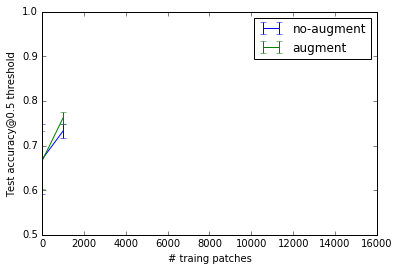

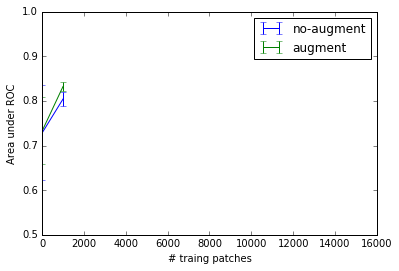

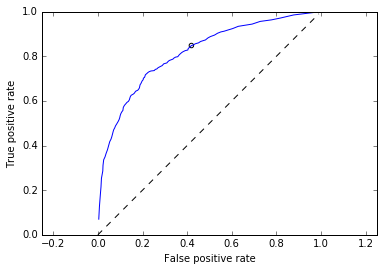

In [20]:
for stack1 in ['MD662']:
    
    stacks = [stack1, 'ChatCryoJane201710']
    
    #############################
    
    sample_locations_allStacks = {stack: grid_parameters_to_sample_locations(win_id_to_gridspec(win_id=5, stack=stack)) 
                              for stack in stacks}
    
    #############################
    
    grid_indices_lookup_allStacks = {}

    for stack in [stack1]:
        try:
            grid_indices_lookup_allStacks[stack] = \
            DataManager.load_annotation_to_grid_indices_lookup(stack=stack, win_id=win_id,
                                                               by_human=False, timestamp='latest',
                                                               detector_id_f=1)
        #     grid_indices_lookup_allStacks[stack] = \
        #     DataManager.load_annotation_to_grid_indices_lookup(stack=stack, win_id=win_id,
        #                                                        by_human=True, timestamp='latest')
        except Exception as e:
            print e
            sys.stderr.write("Fail to load annotation grid lookup for %s.\n" % stack)


    # stack = 'MD661'
    stack = 'ChatCryoJane201710'
    try:
        grid_indices_lookup_allStacks[stack] = \
        DataManager.load_annotation_to_grid_indices_lookup(stack=stack, win_id=win_id,
                                                           by_human=True, timestamp='latest')
    except:
        sys.stderr.write("Fail to load annotation grid lookup for %s.\n" % stack)
        
    #############################
    
    from itertools import chain
    all_labels = sorted(list(set(chain.from_iterable(set(grid_indices_lookup_allStacks[st].columns.tolist()) for st in stacks))))
    
    address_multidx = pd.MultiIndex.from_tuples([(stack, sec, grid_idx) 
           for stack in sorted(stacks)
           for sec in np.arange(metadata_cache['section_limits'][stack][0], 
                                metadata_cache['section_limits'][stack][-1]+1)
           for grid_idx in range(len(sample_locations_allStacks[stack]))], 
          names=['stack', 'section', 'grid_idx'])
    
    address_label_df_allStacks = DataFrame(columns=all_labels,
    index=address_multidx, data=False)
    
    # surround_margins = [200, 500]
    surround_margins = [200]
    
    # Option 1: Use the cached file that stores the mapping from grid-indices to labels for speed up.

    for stack in stacks:
    # for stack in ['MD661']:
    # for stack in ['ChatCryoJane201710']:

        grid_index_class_lookup = grid_indices_lookup_allStacks[stack]

        for sec in grid_index_class_lookup.index:
            sys.stderr.write('Computing class label to grid indices lookup-table for section %d...\n' % sec)
            if is_invalid(sec=sec, stack=stack):
                continue

            for label, grid_indices in grid_index_class_lookup.loc[sec].dropna().iteritems():
                if label == 'bg' or label == 'noclass' or 'negative' in label: # Ignore bg, noclass, x_negative
                    continue

                name, side, margin, surr_name = parse_label(label)

                if name == '7N' and (margin is None or (margin is not None and int(margin) in surround_margins)):

                    sys.stderr.write("%s, sec %d: %d patches from label %s.\n" % (stack, sec, len(grid_indices), label))
        #             t = time.time()
                    for grid_idx in grid_indices:
                        address_label_df_allStacks.loc[(stack, sec, grid_idx), label] = True
        #             sys.stderr.write("%.2f s\n" % (time.time()-t))

    del grid_indices_lookup_allStacks
    
    ###################################
    
    # structure = 'Amb'
    structure = '7N'
    # structure = 'SNR'
    positive_labels = [structure]
    negative_labels = get_negative_labels(structure, 'neg_has_all_surround', margin_um=200, 
                                          labels_found=address_label_df_allStacks.columns)
    # negative_labels = get_negative_labels(structure, 'neg_has_all_surround', margin_um=500, 
    #                                       labels_found=address_label_df_allStacks.columns)
    
    ####################################
    
    train_stacks = [stack1]
    test_stacks = ['ChatCryoJane201710']
    
    train_stack_section_number = {stack1: 10}
    test_stack_section_number = {'ChatCryoJane201710': 10}

    train_stack_stain = {stack1: 'F'}
    test_stack_stain = {'ChatCryoJane201710': 'A'}
    
    positive_addresses_traindata_all_stacks = {}
    negative_addresses_traindata_all_stacks = {}

    for train_stack in train_stacks:

        q = address_label_df_allStacks[address_label_df_allStacks[positive_labels].any(axis=1)]
        all_sections = np.unique(q.loc[train_stack].index.get_level_values('section'))
        train_sections = [] # sections that contain patches of relevant classes.
        for sec in all_sections:
            try:
                if len(q.loc[train_stack, sec].index.values.tolist()) > 0:
                    train_sections.append(sec)
                    print 'Section', sec, 'provides', len(q.loc[train_stack, sec].index.values.tolist()), 'positive patches.'
            except:
                pass

        ###################################################################################

        n_train_sections = train_stack_section_number[train_stack]
        # n_train_sections = 10
        # n_train_sections = len(train_sections)

        if train_stack_stain[train_stack] == 'F':
            neurotrace_sections = []
            nissl_sections = []
            for sec in train_sections:
                if metadata_cache['sections_to_filenames'][train_stack][sec].split('-')[1][0] == 'F':
                    neurotrace_sections.append(sec)
                else:
                    nissl_sections.append(sec)
            random_train_sections = np.random.choice(neurotrace_sections, min(len(neurotrace_sections), n_train_sections), replace=False)
        else:
            random_train_sections = np.random.choice(train_sections, min(len(train_sections), n_train_sections), replace=False)

        positive_addresses_traindata_all_stacks[train_stack] = address_label_df_allStacks[address_label_df_allStacks[positive_labels].any(axis=1)].loc[[train_stack], random_train_sections, :].index.values.tolist() 
        negative_addresses_traindata_all_stacks[train_stack] = address_label_df_allStacks[address_label_df_allStacks[negative_labels].any(axis=1)].loc[[train_stack], random_train_sections, :].index.values.tolist() 

    positive_addresses_traindata = sum(positive_addresses_traindata_all_stacks.values(), [])
    negative_addresses_traindata = sum(negative_addresses_traindata_all_stacks.values(), [])

    print '# positive train =', len(positive_addresses_traindata)
    print '# negative train =', len(negative_addresses_traindata)

    del positive_addresses_traindata_all_stacks, negative_addresses_traindata_all_stacks
    
    positive_addresses_testdata_all_stacks = {}
    negative_addresses_testdata_all_stacks = {}

    for test_stack in test_stacks:

        q = address_label_df_allStacks[address_label_df_allStacks[positive_labels].any(axis=1)]
        all_sections = np.unique(q.loc[test_stack].index.get_level_values('section'))
        test_sections = [] # sections that contain patches of relevant classes.
        for sec in all_sections:
            try:
                if len(q.loc[test_stack, sec].index.values.tolist()) > 0:
                    test_sections.append(sec)
                    print 'Section', sec, 'provides', len(q.loc[test_stack, sec].index.values.tolist()), 'positive patches.'
            except:
                pass

        #####################################################################################

        n_test_sections = test_stack_section_number[test_stack]
    #     n_test_sections = 10
        # n_test_sections = len(test_sections)

        if test_stack_stain[test_stack] == 'F':

            neurotrace_sections = []
            nissl_sections = []
            for sec in test_sections:
                if metadata_cache['sections_to_filenames'][test_stack][sec].split('-')[1][0] == 'F':
                    neurotrace_sections.append(sec)
                else:
                    nissl_sections.append(sec)
            random_test_sections = np.random.choice(neurotrace_sections, min(len(neurotrace_sections), n_test_sections), replace=False)
        else:
            random_test_sections = np.random.choice(test_sections, min(len(test_sections), n_test_sections), replace=False)

        positive_addresses_testdata_all_stacks[test_stack] = address_label_df_allStacks[address_label_df_allStacks[positive_labels].any(axis=1)].loc[[test_stack], random_test_sections, :].index.values.tolist()
        negative_addresses_testdata_all_stacks[test_stack] = address_label_df_allStacks[address_label_df_allStacks[negative_labels].any(axis=1)].loc[[test_stack], random_test_sections, :].index.values.tolist()

    positive_addresses_testdata = sum(positive_addresses_testdata_all_stacks.values(), [])
    negative_addresses_testdata = sum(negative_addresses_testdata_all_stacks.values(), [])

    print '# positive test =', len(positive_addresses_testdata)
    print '# negative test =', len(negative_addresses_testdata)

    del positive_addresses_testdata_all_stacks, negative_addresses_testdata_all_stacks
    
    # schemes = ['normalize_mu_region_sigma_wholeImage_(-1,9)']
    # schemes = ['normalize_mu_region_sigma_wholeImage_(-1,9)', 'median_curve']
    # schemes = ['normalize_mu_region_sigma_wholeImage_(-1,5)']
    # schemes = ['stretch_min_max']
    # schemes = [None, 'stretch_min_max']
    # schemes = ['none']
    # schemes = [None, 'median_curve']
    # transforms = ['transform%d' % i for i in range(8)]
    # scheme_transform_multiindex = pd.MultiIndex.from_product([schemes, transforms])

    # features_dict = {(scheme, tfv): {} for scheme in schemes for tfv in transforms}
    features_dict = defaultdict(dict)
    
    # train_scheme = 'stretch_min_max'
    # train_scheme = 'normalize_mu_sigma_global_(-1,5)'
    train_scheme = 'normalize_mu_region_sigma_wholeImage_(-1,5)'
    # train_scheme = 'normalize_mu_region_sigma_wholeImage_(-1,9)'
    # train_scheme = 'none'
    addresses_to_compute = positive_addresses_traindata + negative_addresses_traindata

    patches_with_desired_label = \
    extract_patches_given_locations_multiple_sections(addresses=addresses_to_compute,
    #                                                     images={('MD661', 199): img},
                                                  win_id=win_id, 
                                                normalization_scheme=train_scheme,
                                                 location_or_grid_index='grid_index')

    #     display_images_in_grids(patches_with_desired_label, nc=10, cmap=plt.cm.gray)

    # for variant in [0]:
    for variant in range(8):

        t = time.time()
    #             patches_rotated = rotate_all_patches(patches_enlarged, r=r, output_size=224)
        patches_rotated = rotate_all_patches_variant(patches_with_desired_label, variant=variant)
        sys.stderr.write('Compute variants: %.2f seconds\n' % (time.time() - t))

        t = time.time()
        features = convert_image_patches_to_features_v2(patches_rotated, model=model, 
                                                     mean_img=mean_img, 
    #                                                      mean_img=np.zeros((224,224), dtype=np.uint8), 
                                                     batch_size=batch_size)
        sys.stderr.write('Feature computation: %.2f seconds\n' % (time.time() - t))

        for i, f in enumerate(features):
    #             features_df.loc[addresses_with_desired_label[i]][(scheme, 'transform%d'%variant)] = f
            features_dict[(train_scheme, 'transform%d'%variant)][addresses_to_compute[i]] = f
        
    
    # test_scheme = 'stretch_min_max'
    # test_scheme = 'normalize_mu_sigma_global_(-1,5)'
    test_scheme = 'normalize_mu_region_sigma_wholeImage_(-1,5)'
    # test_scheme = 'median_curve'
    # test_scheme = 'normalize_mu_region_sigma_wholeImage_(-1,9)'
    # test_scheme = 'none'
    addresses_to_compute = positive_addresses_testdata + negative_addresses_testdata

    patches_with_desired_label = \
    extract_patches_given_locations_multiple_sections(addresses=addresses_to_compute,
    #                                                     images={('MD661', 199): img},
                                                  win_id=win_id, 
                                                normalization_scheme=test_scheme,
                                                 location_or_grid_index='grid_index')

    #     display_images_in_grids(patches_with_desired_label, nc=10, cmap=plt.cm.gray)

    for variant in [0]:
    # for variant in range(8):

        t = time.time()
    #             patches_rotated = rotate_all_patches(patches_enlarged, r=r, output_size=224)
        patches_rotated = rotate_all_patches_variant(patches_with_desired_label, variant=variant)
        sys.stderr.write('Compute variants: %.2f seconds\n' % (time.time() - t))

        t = time.time()
        features = convert_image_patches_to_features_v2(patches_rotated, model=model, 
                                                     mean_img=mean_img, 
    #                                                      mean_img=np.zeros((224,224), dtype=np.uint8), 
                                                     batch_size=batch_size)
        sys.stderr.write('Feature computation: %.2f seconds\n' % (time.time() - t))

        for i, f in enumerate(features):
    #             features_df.loc[addresses_with_desired_label[i]][(scheme, 'transform%d'%variant)] = f
            features_dict[(test_scheme, 'transform%d'%variant)][addresses_to_compute[i]] = f
        
    ###########################################################
    
    # n_train_list = [10, 100, 200, 500, 1000, 2000, 5000, 10000, 15000]
    n_train_list = [10, 1000]
    test_metrics_all_ntrain = defaultdict(lambda: defaultdict(list))
    train_metrics_all_ntrain = defaultdict(lambda: defaultdict(list))

    for n_train in n_train_list:

        for trial in range(10):

            # If train and test data are from different sets
        #     n_train_pos = 5000
            n_train_pos = n_train
            if len(positive_addresses_traindata) < n_train_pos:
                continue
            training_pos_indices = np.random.choice(range(len(positive_addresses_traindata)), n_train_pos, replace=False)
            n_test_pos = 1000
            test_pos_indices = np.random.choice(range(len(positive_addresses_testdata)),
                                                size=min(len(positive_addresses_testdata), n_test_pos), 
                                                replace=False)

            # If train and test are from same set
        #     n_pos_total = len(positive_addresses)
        #     n_train_pos = 1000
        #     training_pos_indices = np.random.choice(range(n_pos_total), n_train_pos, replace=False)
        #     test_pos_indices = np.random.choice(np.setdiff1d(range(n_pos_total), training_pos_indices),
        #                                         size=min(2000, n_pos_total-n_train_pos), replace=False)
        #     n_test_pos = len(test_pos_indices)

            ###############

            # If train and test data are from different sets
        #     n_train_neg = 5000
            n_train_neg = n_train
            training_neg_indices = np.random.choice(range(len(negative_addresses_traindata)), n_train_neg, replace=False)
            n_test_neg = 1000
            test_neg_indices = np.random.choice(range(len(negative_addresses_testdata)),
                                                size=min(len(negative_addresses_testdata), n_test_neg), 
                                                replace=False)

            # If train and test are from same set
        #     n_neg_total = len(negative_addresses)
        #     n_train_neg = 1000
        #     training_neg_indices = np.random.choice(range(n_neg_total), n_train_neg, replace=False)
        #     test_neg_indices = np.random.choice(np.setdiff1d(range(n_neg_total), training_neg_indices), 
        #                                         size=min(2000, n_pos_total-n_train_pos), replace=False)
        #     n_test_neg = len(test_neg_indices)

            print "Training: %d positive, %d negative" % (n_train_pos, n_train_neg)
            print "Test: %d positive, %d negative" % (n_test_pos, n_test_neg)

            ################

            # If train and test data are from different sets
            addresses_train_pos = [positive_addresses_traindata[i] for i in training_pos_indices]
            addresses_test_pos = [positive_addresses_testdata[i] for i in test_pos_indices]
            addresses_train_neg = [negative_addresses_traindata[i] for i in training_neg_indices]
            addresses_test_neg = [negative_addresses_testdata[i] for i in test_neg_indices]

            # If train and test data are from same set
        #     addresses_train_pos = [positive_addresses[i] for i in training_pos_indices]
        #     addresses_test_pos = [positive_addresses[i] for i in test_pos_indices]
        #     addresses_train_neg = [negative_addresses[i] for i in training_neg_indices]
        #     addresses_test_neg = [negative_addresses[i] for i in test_neg_indices]

            #################

            for augment_training in [True, False]:
    #         for augment_training in [False]:

                feature_classifier_alg = 'lr'
        #             feature_classifier_alg = 'xgb2'
        #             feature_classifier_alg = 'lin_svc'
        #             feature_classifier_alg = 'lin_svc_calib'
                sample_weights = None   

                if augment_training:
                    train_transforms = range(8)
                else:
                    train_transforms = range(1)

                test_transforms = range(1)

                features_train_pos = {(train_scheme, 'transform%d'%tf_variant): 
                                      [features_dict[(train_scheme, 'transform%d'%tf_variant)][addr] 
                                       for addr in addresses_train_pos]
                                          for tf_variant in train_transforms}
                features_train_neg = {(train_scheme, 'transform%d'%tf_variant): 
                                      [features_dict[(train_scheme, 'transform%d'%tf_variant)][addr] 
                                       for addr in addresses_train_neg]
                                          for tf_variant in train_transforms}
                features_test_pos = {(test_scheme, 'transform%d'%tf_variant): 
                                     [features_dict[(test_scheme, 'transform%d'%tf_variant)][addr] 
                                      for addr in addresses_test_pos]
                                         for tf_variant in test_transforms}
                features_test_neg = {(test_scheme, 'transform%d'%tf_variant): 
                                     [features_dict[(test_scheme, 'transform%d'%tf_variant)][addr]
                                      for addr in addresses_test_neg]
                                         for tf_variant in test_transforms}    

                if augment_training:

                    train_data_list = []
                    train_label_list = []
                    for tf in range(8):
                        train_data = np.r_[features_train_pos[(train_scheme,'transform%d'%tf)], 
                                           features_train_neg[(train_scheme,'transform%d'%tf)]]
                        train_data_list.append(train_data)

                        train_labels = np.r_[np.ones((len(features_train_pos[(train_scheme,'transform%d'%tf)]), )), 
                                             -np.ones((len(features_train_neg[(train_scheme,'transform%d'%tf)]), ))]
                        train_label_list.append(train_labels)

                    train_data = np.concatenate(train_data_list)
                    train_labels = np.concatenate(train_label_list)        
                else:

                    train_data = np.r_[features_train_pos[(train_scheme,'transform0')], 
                                       features_train_neg[(train_scheme,'transform0')]]
                    train_labels = np.r_[np.ones((len(features_train_pos[(train_scheme,'transform0')]), )), 
                                         -np.ones((len(features_train_neg[(train_scheme,'transform0')]), ))]


                clf = train_binary_classifier(train_data, train_labels,
                                       alg=feature_classifier_alg, 
                                       sample_weights=sample_weights)

                #     trained_classifiers[structure] = clf

                #         clf_fp = DataManager.get_classifier_filepath(classifier_id=svm_id, structure=structure)
                #         create_parent_dir_if_not_exists(clf_fp)
                #         joblib.dump(clf, clf_fp)
                #         upload_to_s3(clf_fp)

                train_metrics = compute_classification_metrics(clf.predict_proba(train_data)[:,1], train_labels)
                train_metrics_all_ntrain[n_train][(train_scheme, 'augment' if augment_training else 'no-augment')].append(train_metrics)

                test_data = np.r_[features_test_pos[(test_scheme,'transform0')], features_test_neg[(test_scheme,'transform0')]]
                test_labels = np.r_[np.ones((len(features_test_pos[(test_scheme,'transform0')]), )), 
                                     -np.ones((len(features_test_neg[(test_scheme,'transform0')]), ))]
                test_metrics = compute_classification_metrics(clf.predict_proba(test_data)[:,1], test_labels)
    #             print "acc@0.5 = %.3f, acc@opt = %.3f, opt_thresh = %.3f, auroc = %.3f, auprc = %.3f" % \
    #             (test_metrics['acc'][0.5], test_metrics['acc'][test_metrics['opt_thresh']], test_metrics['opt_thresh'], test_metrics['auroc'], test_metrics['auprc'])

                test_metrics_all_ntrain[n_train][(test_scheme, 'augment' if augment_training else 'no-augment')].append(test_metrics)

    train_metrics_all_ntrain.default_factory = None
    test_metrics_all_ntrain.default_factory = None
    
    
    plot_result_wrt_ntrain(extract_one_metric(test_metrics_all_ntrain, 'acc', 0.5), ylabel='Test accuracy@0.5 threshold');
    plot_result_wrt_ntrain(extract_one_metric(test_metrics_all_ntrain, 'auroc'), ylabel='Area under ROC');

    plot_roc_curve(test_metrics_all_ntrain[1000][('normalize_mu_region_sigma_wholeImage_(-1,5)',
                  'augment')][0]['fp'], 
                   test_metrics_all_ntrain[1000][('normalize_mu_region_sigma_wholeImage_(-1,5)',
                  'augment')][0]['tp'], 
                  test_metrics_all_ntrain[1000][('normalize_mu_region_sigma_wholeImage_(-1,5)',
                  'augment')][0]['opt_thresh']);
    
    import uuid

    result = {
        'n_train_sections': train_stack_section_number,
        'n_test_sections': test_stack_section_number,
        'train_stain': train_stack_stain,
        'test_stain': test_stack_stain,
        'train_stack': train_stack,
        'test_stack': test_stack,
        'test_scheme': test_scheme,
        'train_scheme': train_scheme,
        'train_metrics_all_ntrain': train_metrics_all_ntrain,
        'test_metrics_all_ntrain': test_metrics_all_ntrain
    }

    create_if_not_exists(ROOT_DIR + '/assessment_results_v2/')
    save_pickle(result, ROOT_DIR + '/assessment_results_v2/assessment_result_%s.pkl' % str(uuid.uuid1()).split('-')[0])